In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import imblearn
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/rajkumar6891/Customer-Churn-Predictability-for-Banking-System/master/Bank_churn_modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
data.shape

(10000, 14)

In [5]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

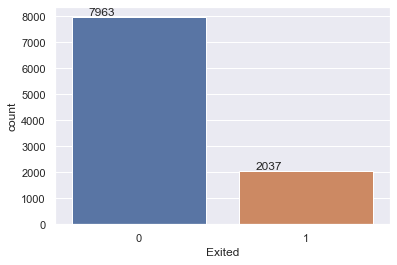

In [6]:
ax = sns.countplot('Exited', data=data)
for i in ax.patches:
    ax.annotate((i.get_height()), (i.get_x()+0.1, i.get_height()+50))

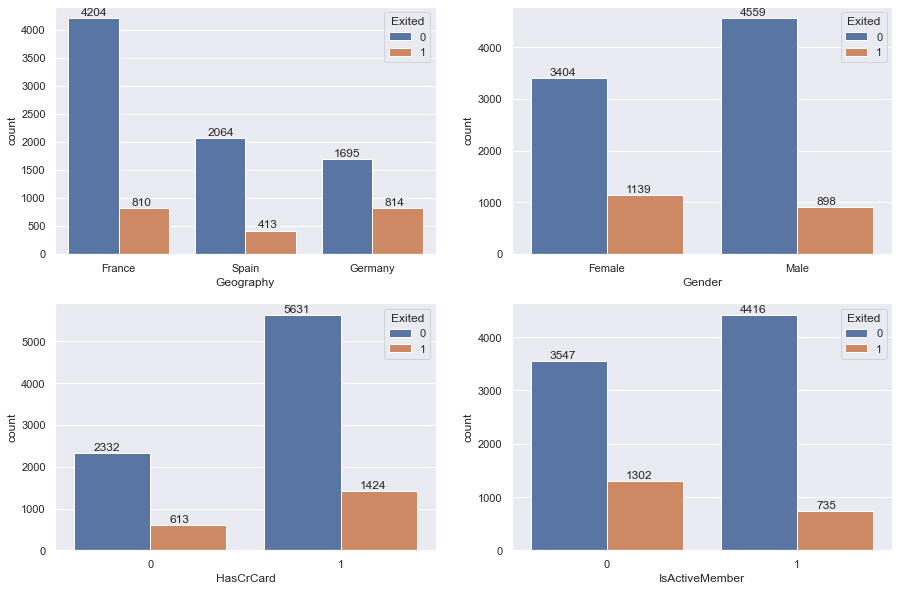

In [7]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

ax1 = sns.countplot('Geography', data=data, hue='Exited', ax=ax[0,0])
for i in ax1.patches:
    ax1.annotate((i.get_height()), (i.get_x()+0.1, i.get_height()+50))
    
ax2 = sns.countplot('Gender', data=data, hue='Exited', ax=ax[0,1])
for i in ax2.patches:
    ax2.annotate((i.get_height()), (i.get_x()+0.1, i.get_height()+50))
    
ax3 = sns.countplot('HasCrCard', data=data, hue='Exited', ax=ax[1,0])
for i in ax3.patches:
    ax3.annotate((i.get_height()), (i.get_x()+0.1, i.get_height()+50))
    
ax4 = sns.countplot('IsActiveMember', data=data, hue='Exited', ax=ax[1,1])
for i in ax4.patches:
    ax4.annotate((i.get_height()), (i.get_x()+0.1, i.get_height()+50))

In [8]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [9]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
#Kruskal Wallis H Test to determine the relation between a categorical and continuous variable

numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for col in numeric_cols:
    Exited_1 = data.loc[data["Exited"]==1]
    Exited_0 = data.loc[data['Exited']==0]
    print("Overall variance of {} variable is {}" .format(col, round(data[col].var(),2)))
    print("Variance of {} variable with churned customers is {}" .format(col, round(Exited_1[col].var(),2)))
    print("Variance of {} variable with not churned customers is {}".format(col, round(Exited_0[col].var(),2)))
    print('*********************************************************')

Overall variance of CreditScore variable is 9341.86
Variance of CreditScore variable with churned customers is 10064.4
Variance of CreditScore variable with not churned customers is 9149.66
*********************************************************
Overall variance of Age variable is 109.99
Variance of Age variable with churned customers is 95.29
Variance of Age variable with not churned customers is 102.52
*********************************************************
Overall variance of Tenure variable is 8.36
Variance of Tenure variable with churned customers is 8.62
Variance of Tenure variable with not churned customers is 8.3
*********************************************************
Overall variance of Balance variable is 3893436175.99
Variance of Balance variable with churned customers is 3405982371.54
Variance of Balance variable with not churned customers is 3949876219.91
*********************************************************
Overall variance of NumOfProducts variable is 0.34
Vari

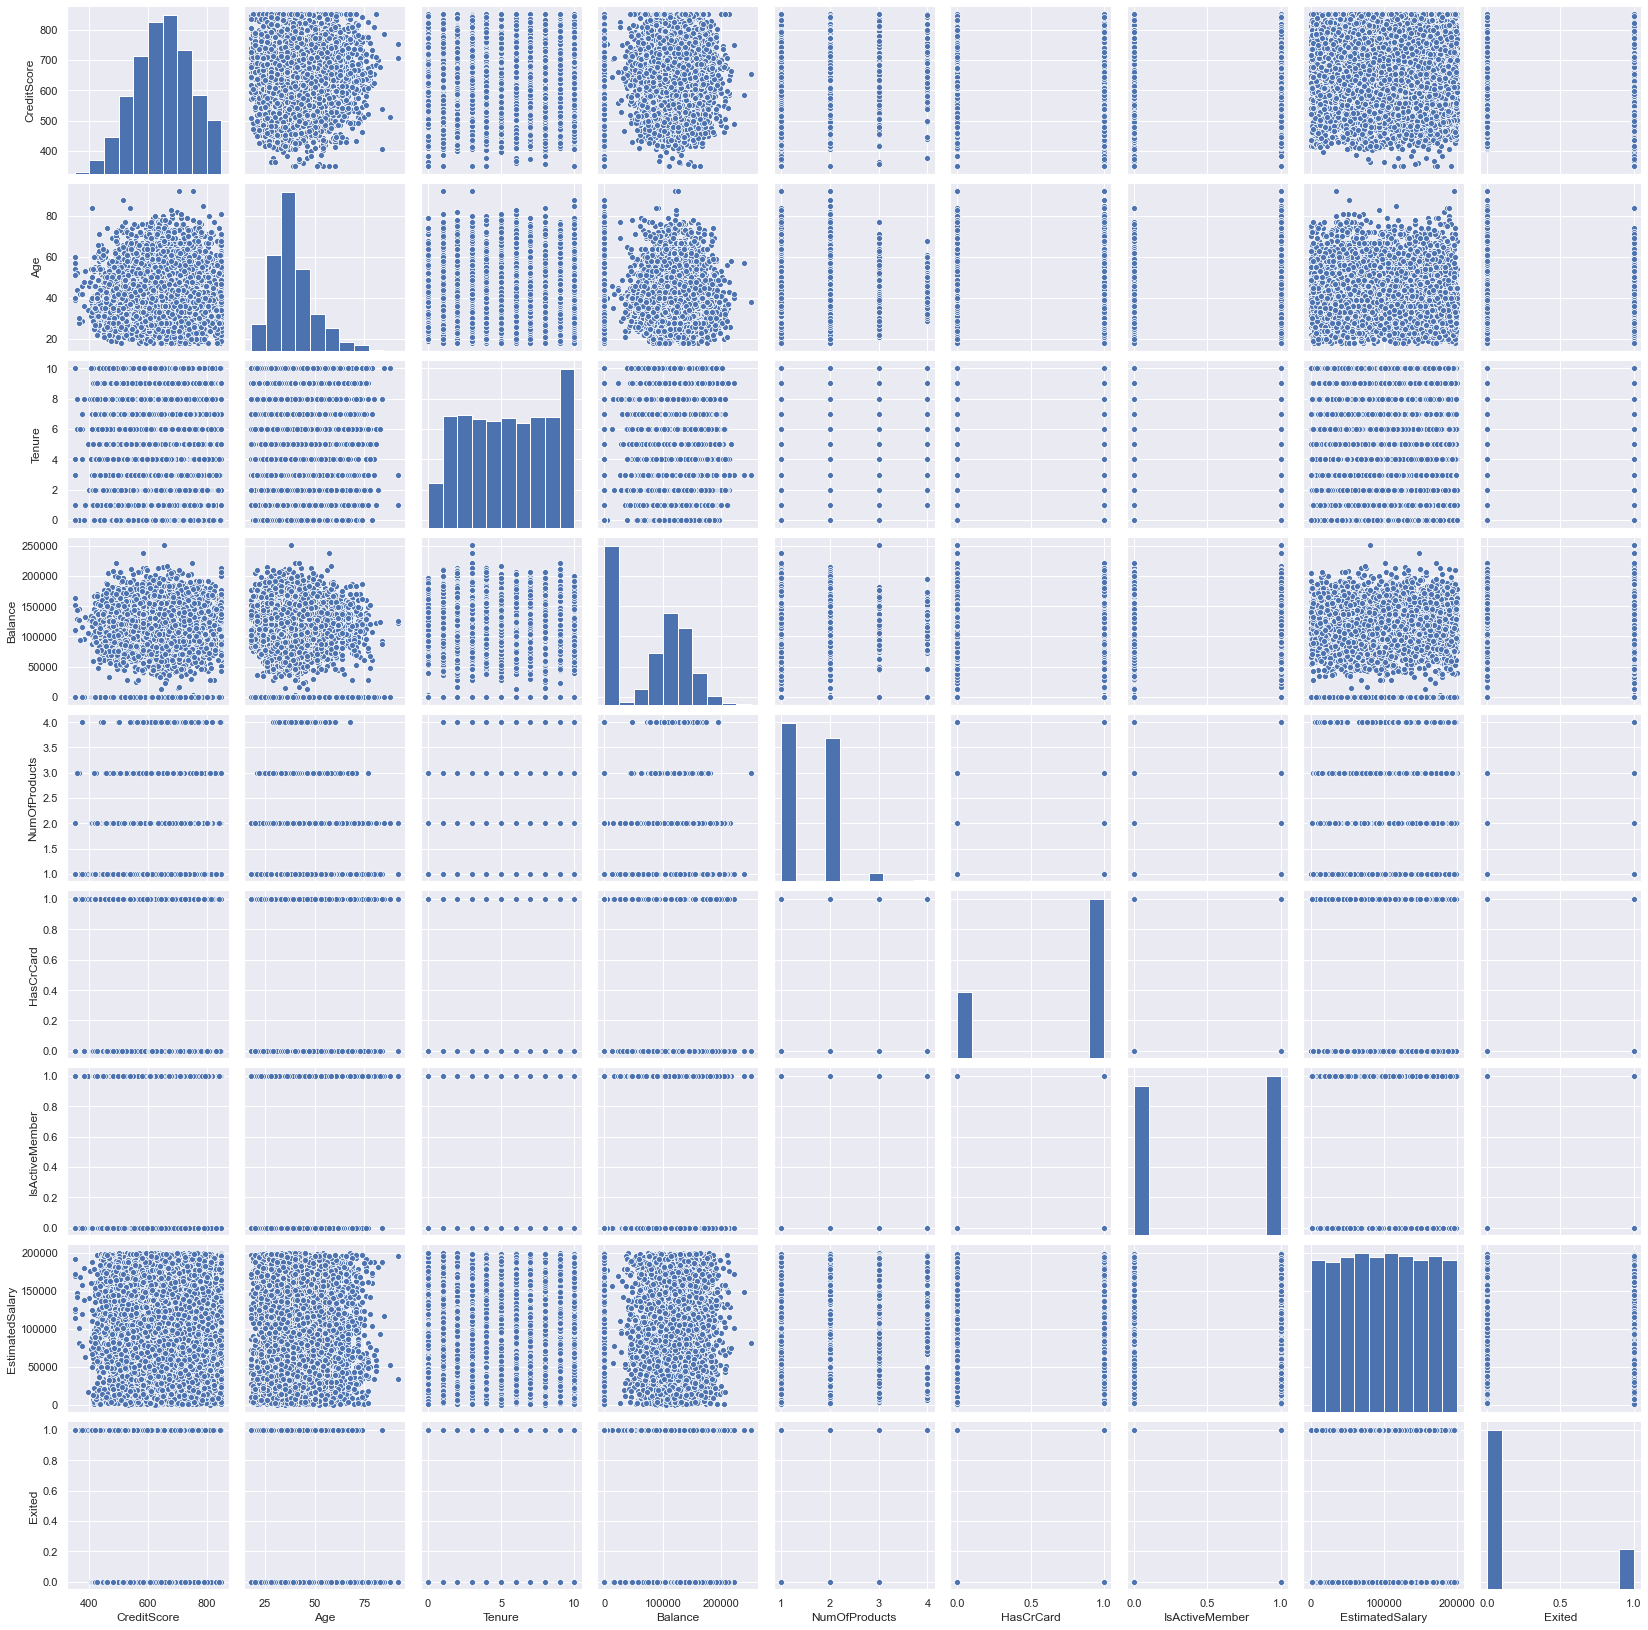

In [11]:
sns.pairplot(data)

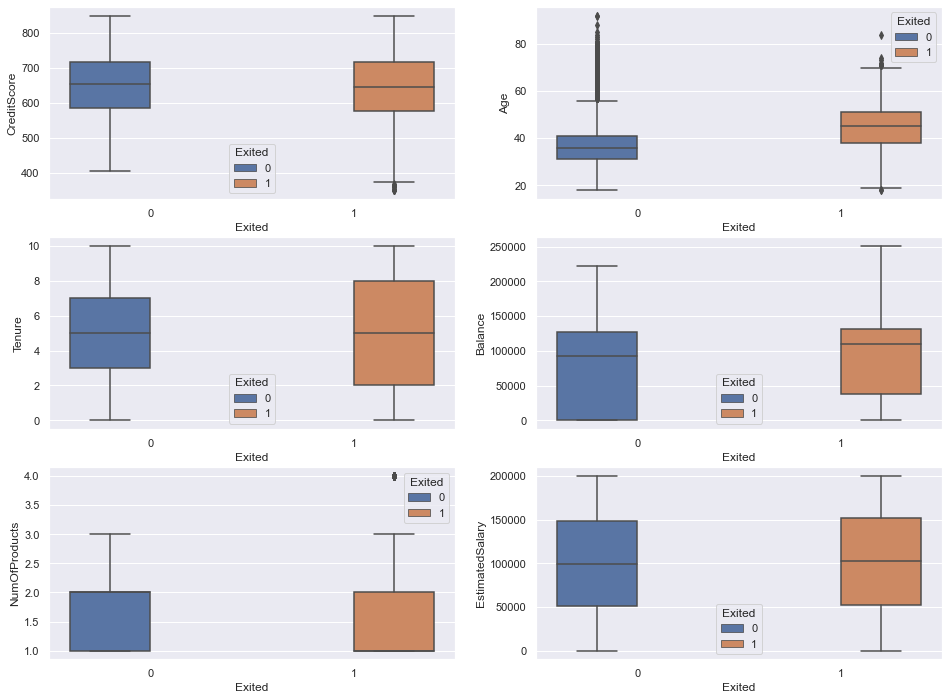

In [12]:
# Relation of taget variable with continuous variables

fig, ax = plt.subplots(3,2, figsize=(16,12))

sns.boxplot(x="Exited", y='CreditScore', data=data, hue="Exited", ax=ax[0,0])
sns.boxplot(x="Exited", y='Age', data=data, hue="Exited", ax=ax[0,1])
sns.boxplot(x="Exited", y='Tenure', data=data, hue="Exited", ax=ax[1,0])
sns.boxplot(x="Exited", y='Balance', data=data, hue="Exited", ax=ax[1,1])
sns.boxplot(x="Exited", y='NumOfProducts', data=data, hue="Exited", ax=ax[2,0])
sns.boxplot(x="Exited", y='EstimatedSalary', data=data, hue="Exited", ax=ax[2,1])

In [13]:
data['Gender'] = np.where(data['Gender']=='Female',1,-1)
data['IsActiveMember'] = np.where(data['IsActiveMember']==1,1,-1)
data['HasCrCard'] = np.where(data['HasCrCard']==1,1,-1)

In [14]:
data = pd.get_dummies(data, columns=['Geography'], prefix="Geography_")
data = pd.get_dummies(data, columns=['NumOfProducts'], prefix="NumOfProd_")
data.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography__France,Geography__Germany,Geography__Spain,NumOfProd__1,NumOfProd__2,NumOfProd__3,NumOfProd__4
0,619,1,42,2,0.00,1,1,101348.88,1,1,0,0,1,0,0,0
1,608,1,41,1,83807.86,-1,1,112542.58,0,0,0,1,1,0,0,0
2,502,1,42,8,159660.80,1,-1,113931.57,1,1,0,0,0,0,1,0
3,699,1,39,1,0.00,-1,-1,93826.63,0,1,0,0,0,1,0,0
4,850,1,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0,0,0


In [15]:
for i in data.columns[-7:]:
    data[i] = np.where(data[i]==1,1,-1)
    
data.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography__France,Geography__Germany,Geography__Spain,NumOfProd__1,NumOfProd__2,NumOfProd__3,NumOfProd__4
0,619,1,42,2,0.00,1,1,101348.88,1,1,-1,-1,1,-1,-1,-1
1,608,1,41,1,83807.86,-1,1,112542.58,0,-1,-1,1,1,-1,-1,-1
2,502,1,42,8,159660.80,1,-1,113931.57,1,1,-1,-1,-1,-1,1,-1
3,699,1,39,1,0.00,-1,-1,93826.63,0,1,-1,-1,-1,1,-1,-1
4,850,1,43,2,125510.82,1,1,79084.10,0,-1,-1,1,1,-1,-1,-1


In [16]:
temp_df = data.corr()

In [17]:
temp_df['Exited'].sort_values(ascending=False)

Exited                1.000000
Age                   0.285323
NumOfProd__3          0.255862
NumOfProd__1          0.185447
Geography__Germany    0.173488
NumOfProd__4          0.153612
Balance               0.118533
Gender                0.106512
EstimatedSalary       0.012097
HasCrCard            -0.007138
Tenure               -0.014001
CreditScore          -0.027094
Geography__Spain     -0.052667
Geography__France    -0.104955
IsActiveMember       -0.156128
NumOfProd__2         -0.292474
Name: Exited, dtype: float64

In [18]:
pd.set_option('display.max_columns', 999)
columns = ['CreditScore' , 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

data[columns] = scaler.fit_transform(data[columns])

data.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography__France,Geography__Germany,Geography__Spain,NumOfProd__1,NumOfProd__2,NumOfProd__3,NumOfProd__4
0,0.538,1,0.324324,0.2,0.000000,1,1,0.506735,1,1,-1,-1,1,-1,-1,-1
1,0.516,1,0.310811,0.1,0.334031,-1,1,0.562709,0,-1,-1,1,1,-1,-1,-1
2,0.304,1,0.324324,0.8,0.636357,1,-1,0.569654,1,1,-1,-1,-1,-1,1,-1
3,0.698,1,0.283784,0.1,0.000000,-1,-1,0.469120,0,1,-1,-1,-1,1,-1,-1
4,1.000,1,0.337838,0.2,0.500246,1,1,0.395400,0,-1,-1,1,1,-1,-1,-1


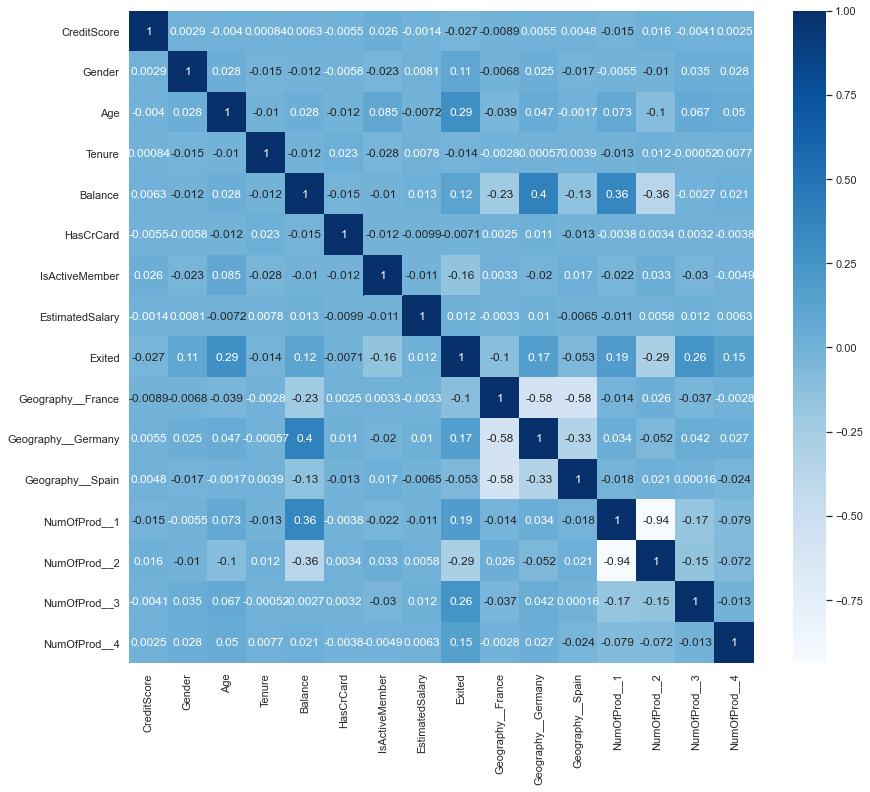

In [19]:
plt.figure(figsize=(14,12))

sns.heatmap(data.corr(), annot=True, cmap='Blues')

In [20]:
y = data["Exited"]
data.drop("Exited", axis=1, inplace=True)

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.3)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [37]:
# Hyper parameter tuning for the ML models

from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(random_state=1)
rfc = RandomForestClassifier(random_state=1)
svm = SVC(random_state=1)
xg_boost = XGBClassifier(random_state=1)

params_logreg = {'solver':['newton-cg', 'lbfgs', 'liblinear'],
                'C':[0.01, 0.1, 1, 10],
                'penalty':['l2']}

params_rfc = {'n_estimators':[10, 40, 50, 75, 100, 200],
            'max_features':['sqrt', 0.25, 0.5, 1, 10],
            'min_samples_leaf':[0.1, 1, 2, 4, 6, 8, 10]}

params_svm = {'C':[0.1, 1, 10, 100],
            'gamma':[0.1, 0.01, 0.001, 0.0001],
            'kernel':['linear','rbf'],
             'probability':[True]}

params_xgboost = {'learning_rate':[0.01, 0.1, 0.8],
            'max_depth':[3, 6, 10],
            'min_child_weight':[1, 3, 6],
            'gamma':[0.1, 1, 10],
            'subsample':[0.5, 0.8,1],
            'colsample_bytree':[0.5,0.8, 1],
            'reg_alpha':[1e-5, 1e-2, 1, 100],
            "objective":['binary:logistic']}


In [26]:
# Best Params for Logistic Regression

grid = GridSearchCV(log_reg, params_logreg, refit=True, cv=5)
logreg_grid = grid.fit(X_train, y_train)
print(logreg_grid.best_params_)
print(logreg_grid.best_estimator_)

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=10, random_state=1, solver='newton-cg')


In [27]:
# Best Params for Random Forest Classifier

rf_grid = GridSearchCV(rfc, params_rfc, refit=True, cv=5)
rfc_grid = rf_grid.fit(X_train, y_train)
print("Random Forest Best Parameters: \n",rfc_grid.best_params_)
print("Random Forest Best Estimators: \n",rfc_grid.best_estimator_)
print("*************************************")

# Best Params for SVM

sv_grid = GridSearchCV(svm, params_svm, refit=True, cv=5)
svm_grid = sv_grid.fit(X_train, y_train)
print("SVM Best Parameters: \n",svm_grid.best_params_)
print("SVM Best Estimators: \n",svm_grid.best_estimator_)
print("*************************************")

# Best Params for XGBoost Classifier

xg_grid = GridSearchCV(xg_boost, params_xgboost, refit=True, cv=5)
xgboost_grid = xg_grid.fit(X_train, y_train)
print("XGBoost Classifier Best Parameters: \n",xgboost_grid.best_params_)
print("XGBoost Classifier Best Estimators: \n",xgboost_grid.best_estimator_)

Random Forest Best Parameters: 
 {'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 75}
Random Forest Best Estimators: 
 RandomForestClassifier(max_features='sqrt', min_samples_leaf=4, n_estimators=75,
                       random_state=1)
*************************************
SVM Best Parameters: 
 {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
SVM Best Estimators: 
 SVC(C=0.1, gamma=0.1, kernel='linear', random_state=1)
*************************************
XGBoost Classifier Best Parameters: 
 {'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'objective': 'binary:logistic', 'reg_alpha': 0.01, 'subsample': 1}
XGBoost Classifier Best Estimators: 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
       

In [28]:
# Predicting using the output using the best parameters

# Predicting using the Logistic Regression and checking the accuracy, classification report and confusion matrix

logreg_pred = logreg_grid.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, logreg_pred))

print(classification_report(y_test, logreg_pred))
print(confusion_matrix(y_test, logreg_pred))
print("*****************************************")

# Predicting using the Random Forest Classifier and checking the accuracy, classification report and confusion matrix

rfc_pred = rfc_grid.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, rfc_pred))

print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))
print("*****************************************")

# Predicting using the SVM Classifier and checking the accuracy, classification report and confusion matrix

svm_pred = svm_grid.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, svm_pred))

print(classification_report(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))
print("*****************************************")

# Predicting using the Logistic Regression and checking the accuracy, classification report and confusion matrix

xgb_pred = xgboost_grid.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, xgb_pred))

print(classification_report(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))

Accuracy:  0.847
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2392
           1       0.74      0.38      0.50       608

    accuracy                           0.85      3000
   macro avg       0.80      0.67      0.71      3000
weighted avg       0.83      0.85      0.83      3000

[[2308   84]
 [ 375  233]]
*****************************************
Accuracy:  0.8673333333333333
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2392
           1       0.77      0.49      0.60       608

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000

[[2306   86]
 [ 312  296]]
*****************************************
Accuracy:  0.823
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2392
           1       0.87      0.15  

Accuracy of Logistic Regression :  0.847
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2392
           1       0.74      0.38      0.50       608

    accuracy                           0.85      3000
   macro avg       0.80      0.67      0.71      3000
weighted avg       0.83      0.85      0.83      3000

[[2308   84]
 [ 375  233]]


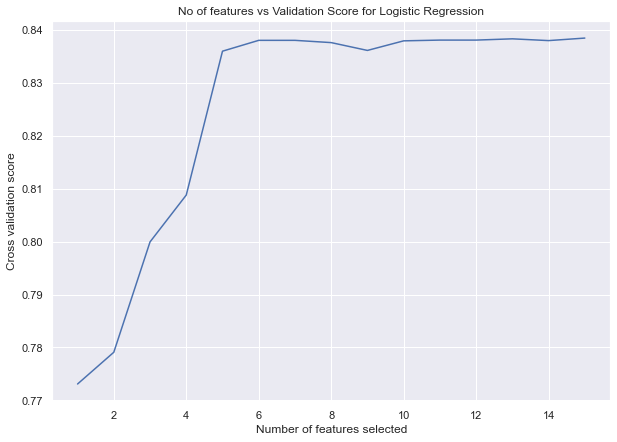

******************************************************
Accuracy of Random Forest Classifier :  0.8623333333333333
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2392
           1       0.75      0.49      0.59       608

    accuracy                           0.86      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000

[[2291  101]
 [ 312  296]]


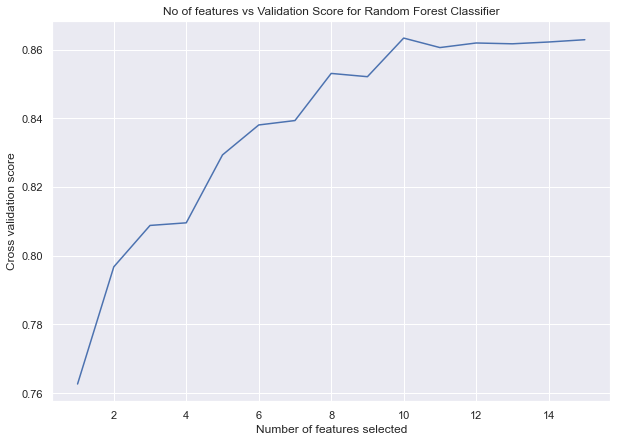

******************************************************
Accuracy of SVM :  0.823
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2392
           1       0.87      0.15      0.26       608

    accuracy                           0.82      3000
   macro avg       0.84      0.57      0.58      3000
weighted avg       0.83      0.82      0.77      3000

[[2378   14]
 [ 517   91]]


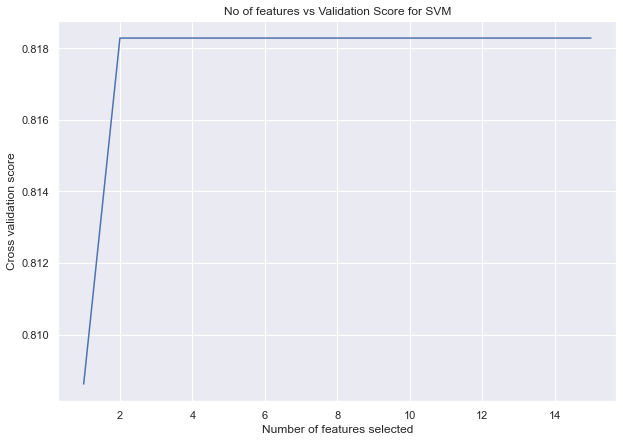

******************************************************
Accuracy of XGBoost Classifier :  0.8636666666666667
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2392
           1       0.74      0.50      0.60       608

    accuracy                           0.86      3000
   macro avg       0.81      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000

[[2287  105]
 [ 304  304]]


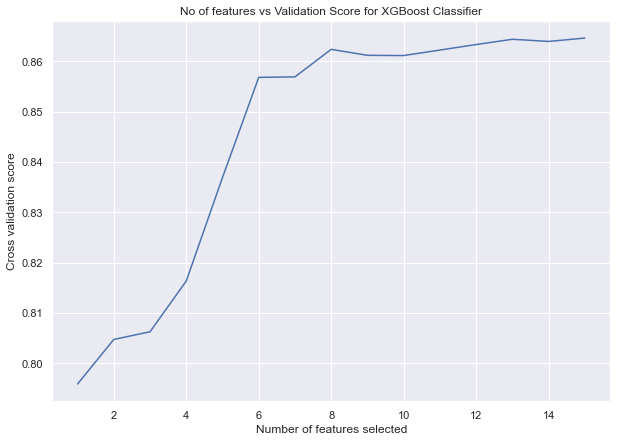

******************************************************


In [31]:
# Implementing RFECV with best parameters to check the optimal number of predictors for prediction

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

rfecv_models = [logreg_grid.best_estimator_, rfc_grid.best_estimator_, svm_grid.best_estimator_, xgboost_grid.best_estimator_]
names = ["Logistic Regression", "Random Forest Classifier", "SVM", "XGBoost Classifier"]

for(model,name) in zip(rfecv_models, names):
    selector = RFECV(estimator=model, step=1, cv=cv, scoring="accuracy")
    selector.fit(X_train, y_train)
    sel_pred = selector.predict(X_test)
    print("Accuracy of "+name+" : ", accuracy_score(y_test, sel_pred))
    print(classification_report(y_test, sel_pred))
    print(confusion_matrix(y_test, sel_pred))
    
    plt.figure(figsize=(10,7))
    plt.plot(range(1, len(selector.grid_scores_)+1), selector.grid_scores_)
    plt.title("No of features vs Validation Score for "+name)
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score")
    plt.show()
    print("******************************************************")

In [41]:
# Balancing the imbalanced data by upsampling using SMOTE module

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)

sm_data_X, sm_data_y = sm.fit_sample(X_train, y_train)
sm_data_X = pd.DataFrame(data=sm_data_X,columns=X_train.columns )
sm_data_y= pd.DataFrame(data=sm_data_y,columns=['Exited'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(sm_data_X))
print("Original length of data was: ", len(X_train))
print("Number of customers not churned in oversampled data",len(sm_data_y[sm_data_y['Exited']==0]))
print("Number of customers churned in oversampled data",len(sm_data_y[sm_data_y['Exited']==1]))
print("Proportion of no subscription data in oversampled data is ",len(sm_data_y[sm_data_y['Exited']==0])/len(sm_data_X))
print("Proportion of subscription data in oversampled data is ",len(sm_data_y[sm_data_y['Exited']==1])/len(sm_data_X))

length of oversampled data is  11142
Original length of data was:  7000
Number of customers not churned in oversampled data 5571
Number of customers churned in oversampled data 5571
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [45]:
# Logistic Regression using upsampled data

log_reg_sm = logreg_grid.best_estimator_.fit(sm_data_X, sm_data_y)
log_pred_sm = log_reg_sm.predict(X_test)

print("Accuracy of Logistic Regression with upsampled data: ",accuracy_score(y_test, log_pred_sm))
print("Classification report of Logistic Regression with upsampled data:\n",classification_report(y_test, log_pred_sm))
print("Confusion Matrix of Logistic Regression with upsampled data:\n",confusion_matrix(y_test, log_pred_sm))

print("Accuracy of Logistic Regression with imbalanced data: ",accuracy_score(y_test, logreg_pred))
print("Classification report of Logistic Regression with imbalanced data:\n",classification_report(y_test, logreg_pred))
print("Classification report of Logistic Regression with imbalanced data:\n",confusion_matrix(y_test, logreg_pred))

Accuracy of Logistic Regression with upsampled data:  0.7556666666666667
Classification report of Logistic Regression with upsampled data:
               precision    recall  f1-score   support

           0       0.92      0.76      0.83      2392
           1       0.44      0.74      0.55       608

    accuracy                           0.76      3000
   macro avg       0.68      0.75      0.69      3000
weighted avg       0.82      0.76      0.78      3000

Confusion Matrix of Logistic Regression with upsampled data:
 [[1819  573]
 [ 160  448]]
Accuracy of Logistic Regression with imbalanced data:  0.847
Classification report of Logistic Regression with imbalanced data:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      2392
           1       0.74      0.38      0.50       608

    accuracy                           0.85      3000
   macro avg       0.80      0.67      0.71      3000
weighted avg       0.83      0.85      0.83

In [48]:
# Random Forest Classifier using upsampled data

rfc_sm = rfc_grid.best_estimator_.fit(sm_data_X, sm_data_y)
rfc_pred_sm = rfc_sm.predict(X_test)

print("Accuracy of Random Forest Classifier with upsampled data: ",accuracy_score(y_test, rfc_pred_sm))
print("Classification report of Random Forest Classifier with upsampled data:\n",classification_report(y_test, rfc_pred_sm))
print("Confusion Matrix of Random Forest Classifier with upsampled data:\n",confusion_matrix(y_test, rfc_pred_sm))

print("Accuracy of Random Forest Classifier with imbalanced data: ",accuracy_score(y_test, rfc_pred))
print("Classification report of Random Forest Classifier with imbalanced data:\n",classification_report(y_test, rfc_pred))
print("Classification report of Random Forest Classifier with imbalanced data:\n",confusion_matrix(y_test, rfc_pred))

Accuracy of Random Forest Classifier with upsampled data:  0.8156666666666667
Classification report of Random Forest Classifier with upsampled data:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88      2392
           1       0.54      0.68      0.60       608

    accuracy                           0.82      3000
   macro avg       0.72      0.77      0.74      3000
weighted avg       0.84      0.82      0.82      3000

Confusion Matrix of Random Forest Classifier with upsampled data:
 [[2031  361]
 [ 192  416]]
Accuracy of Random Forest Classifier with imbalanced data:  0.8673333333333333
Classification report of Random Forest Classifier with imbalanced data:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2392
           1       0.77      0.49      0.60       608

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weigh

In [49]:
# SVM using upsampled data

svm_sm = SVC(C=0.1, gamma=0.1, kernel='linear', random_state=1).fit(sm_data_X, sm_data_y)
svm_pred_sm = svm_sm.predict(X_test)

print("Accuracy of SVM with upsampled data: ",accuracy_score(y_test, svm_pred_sm))
print("Classification report of SVM with upsampled data:\n",classification_report(y_test, svm_pred_sm))
print("Confusion Matrix of SVM with upsampled data:\n",confusion_matrix(y_test, svm_pred_sm))

print("Accuracy of SVM with imbalanced data: ",accuracy_score(y_test, logreg_pred))
print("Classification report of SVM with imbalanced data:\n",classification_report(y_test,svm_pred))
print("Classification report of SVM with imbalanced data:\n",confusion_matrix(y_test,svm_pred))

Accuracy of SVM with upsampled data:  0.7513333333333333
Classification report of SVM with upsampled data:
               precision    recall  f1-score   support

           0       0.92      0.75      0.83      2392
           1       0.43      0.74      0.55       608

    accuracy                           0.75      3000
   macro avg       0.68      0.75      0.69      3000
weighted avg       0.82      0.75      0.77      3000

Confusion Matrix of SVM with upsampled data:
 [[1802  590]
 [ 156  452]]
Accuracy of SVM with imbalanced data:  0.847
Classification report of SVM with imbalanced data:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90      2392
           1       0.87      0.15      0.26       608

    accuracy                           0.82      3000
   macro avg       0.84      0.57      0.58      3000
weighted avg       0.83      0.82      0.77      3000

Classification report of SVM with imbalanced data:
 [[2378   14]
 [ 

In [56]:
# XGBoost Classifier using upsampled data

xgboost_sm = xgboost_grid.best_estimator_.fit(sm_data_X, sm_data_y)
xgboost_pred_sm = xgboost_sm.predict(X_test)

print("Accuracy of XGBoost Classifier with upsampled data: ",accuracy_score(y_test, xgboost_pred_sm))
print("Classification report of XGBoost Classifier with upsampled data:\n",classification_report(y_test, xgboost_pred_sm))
print("Confusion Matrix of XGBoost Classifier with upsampled data:\n",confusion_matrix(y_test, xgboost_pred_sm))

print("Accuracy of XGBoost Classifier with imbalanced data: ",accuracy_score(y_test, xgb_pred))
print("Classification report of XGBoost Classifier with imbalanced data:\n",classification_report(y_test, xgb_pred))
print("Classification report of XGBoost Classifier with imbalanced data:\n",confusion_matrix(y_test, xgb_pred))

Accuracy of XGBoost Classifier with upsampled data:  0.847
Classification report of XGBoost Classifier with upsampled data:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      2392
           1       0.63      0.59      0.61       608

    accuracy                           0.85      3000
   macro avg       0.76      0.75      0.76      3000
weighted avg       0.84      0.85      0.85      3000

Confusion Matrix of XGBoost Classifier with upsampled data:
 [[2181  211]
 [ 248  360]]
Accuracy of XGBoost Classifier with imbalanced data:  0.8636666666666667
Classification report of XGBoost Classifier with imbalanced data:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2392
           1       0.74      0.50      0.60       608

    accuracy                           0.86      3000
   macro avg       0.81      0.73      0.76      3000
weighted avg       0.85      0.86      0.85     

In [77]:
# Check the accuracy and other parameters after downsampling the dataset

from sklearn.utils import resample

df = pd.concat([data, y], axis=1)

df_majority = df[df['Exited']==0]
df_minority = df[df['Exited']==1]

# Downsampling the majority dataset

df_majority_ds = resample(df_majority, replace=False, n_samples = 2037, random_state = 0)

#Combined the results
downsampled_df = pd.concat([df_majority_ds, df_minority])

downsampled_df['Exited'].value_counts()

1    2037
0    2037
Name: Exited, dtype: int64

In [78]:
y_ds = downsampled_df['Exited']
downsampled_df.drop("Exited", axis=1, inplace=True)

x_train, x_test, y_tran, y_tst = train_test_split(downsampled_df, y_ds, test_size = 0.2, random_state=0)

print(x_train.shape, x_test.shape, y_tran.shape, y_tst.shape)

(3259, 15) (815, 15) (3259,) (815,)


In [79]:
log_reg_ds = logreg_grid.best_estimator_.fit(x_train, y_tran)

log_reg_ds_pred = log_reg_ds.predict(x_test)

print("Accuracy: ", accuracy_score(y_tst, log_reg_ds_pred))
print(classification_report(y_tst, log_reg_ds_pred))
print(confusion_matrix(y_tst, log_reg_ds_pred))

Accuracy:  0.7411042944785277
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       411
           1       0.73      0.76      0.74       404

    accuracy                           0.74       815
   macro avg       0.74      0.74      0.74       815
weighted avg       0.74      0.74      0.74       815

[[297 114]
 [ 97 307]]


In [80]:
rfc_ds = rfc_grid.best_estimator_.fit(x_train, y_tran)

rfc_ds_pred = rfc_ds.predict(x_test)

print("Accuracy: ", accuracy_score(y_tst, rfc_ds_pred))
print(classification_report(y_tst, rfc_ds_pred))
print(confusion_matrix(y_tst, rfc_ds_pred))

Accuracy:  0.758282208588957
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       411
           1       0.76      0.75      0.76       404

    accuracy                           0.76       815
   macro avg       0.76      0.76      0.76       815
weighted avg       0.76      0.76      0.76       815

[[313  98]
 [ 99 305]]


In [93]:
svm_ds = svm_grid.best_estimator_.fit(x_train, y_tran)

svm_ds_pred = svm_ds.predict(x_test)

print("Accuracy: ", accuracy_score(y_tst, svm_ds_pred))
print(classification_report(y_tst, svm_ds_pred))
print(confusion_matrix(y_tst, svm_ds_pred))

Accuracy:  0.7386503067484662
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       411
           1       0.72      0.76      0.74       404

    accuracy                           0.74       815
   macro avg       0.74      0.74      0.74       815
weighted avg       0.74      0.74      0.74       815

[[294 117]
 [ 96 308]]


In [95]:
xgboost_ds = xgboost_grid.best_estimator_.fit(x_train, y_tran)

xgboost_ds_pred = xgboost_ds.predict(x_test)

print("Accuracy: ", accuracy_score(y_tst, xgboost_ds_pred))
print(classification_report(y_tst, xgboost_ds_pred))
print(confusion_matrix(y_tst, xgboost_ds_pred))

Accuracy:  0.7631901840490798
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       411
           1       0.77      0.75      0.76       404

    accuracy                           0.76       815
   macro avg       0.76      0.76      0.76       815
weighted avg       0.76      0.76      0.76       815

[[321  90]
 [103 301]]


In [ ]:
# In this project, we are mainly concerend about correctly identifying "Exited = 1" values, so we will check which above ML models
# give the best F1-score for "Exited=1". As we can see in the above algorithms that even though we got a better accuracy using
# imbalanced data, ehat we are concered here about is the F1 score for Exited=1. From all the algorithms implemented after
# identifying the best parameters, upsampling and downsampling, we can see that eventhough the accuracy has went down with the
# downsampling considerably, the F1 score for the "1" is best with XGBoost after downsampling. So we can conclude that for the 
# given dataset, the best ML model is xgboost after downsampling the dataset.